##1. ARIMA : oil.csv

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00


In [ ]:
# 끝에 10개 행을 test, 나머지 train
# min_max scaling
data = pd.read_csv("oil.csv")
series =

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
series = scaler.fit_transform(series.reshape(-1, 1))

from pmdarima import auto_arima
model = auto_arima(series, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(series)

In [ ]:
# arima
model.predict()
scaler.inverse_transform(model.predict().reshape(-1,1))

array([439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

# LSTM+Optuna




In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

AMZN = yf.download('GOOG', start="2020-01-01", end="2024-11-30")

AMZN = AMZN.round(2)
AMZN.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2020-01-02 00:00:00+00:00,68.20,68.37,68.41,67.08,67.08,28132000
2020-01-03 00:00:00+00:00,67.87,68.03,68.62,67.28,67.39,23728000
2020-01-06 00:00:00+00:00,69.54,69.71,69.82,67.50,67.50,34646000
2020-01-07 00:00:00+00:00,69.50,69.67,70.15,69.52,69.90,30054000
2020-01-08 00:00:00+00:00,70.04,70.22,70.58,69.54,69.60,30560000


In [ ]:
AMZN['Adj Close'].values

array([[ 68.2 ],
       [ 67.87],
       [ 69.54],
       ...,
       [170.62],
       [170.82],
       [170.49]])

In [ ]:
n = 5
x, y = make_sequence(AMZN["Adj Close"].values, n)
x = x.reshape(-1, n, 1)
y = y.reshape(-1, 1)

In [ ]:
print(x.shape)
print(y.shape)

(1232, 5, 1)
(1232, 1)


In [ ]:
test_len = 1000
x_train = x[:test_len]
y_train = y[:test_len]
x_test = x[test_len:]
y_test = y[test_len:]

print('train:', x_train.shape, y_train.shape)
print('test:',x_test.shape, y_test.shape)

train: (1000, 5, 1) (1000, 1)
test: (232, 5, 1) (232, 1)


##  LSTM

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

LSTM_model = Sequential()
LSTM_model.add(LSTM(units = 50, activation = 'tanh', input_shape = (n, 1), return_sequences=True))
LSTM_model.add(LSTM(units = 50, activation = 'tanh'))
LSTM_model.add(Dense(1, activation = 'linear'))

LSTM_model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=False), loss = 'mse')  #mean squared error
LSTM_model.fit(x_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 15695.3828
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6287.3931
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2305.7544
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1772.3322
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1492.0275
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 973.2356
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 838.7286
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 801.1042
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 777.4287
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 799.4557
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 727.5522
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 753.1505
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 770.9110
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 734.8651
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 777.406

In [ ]:
pred = model.predict(x_test)
pred

In [ ]:
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

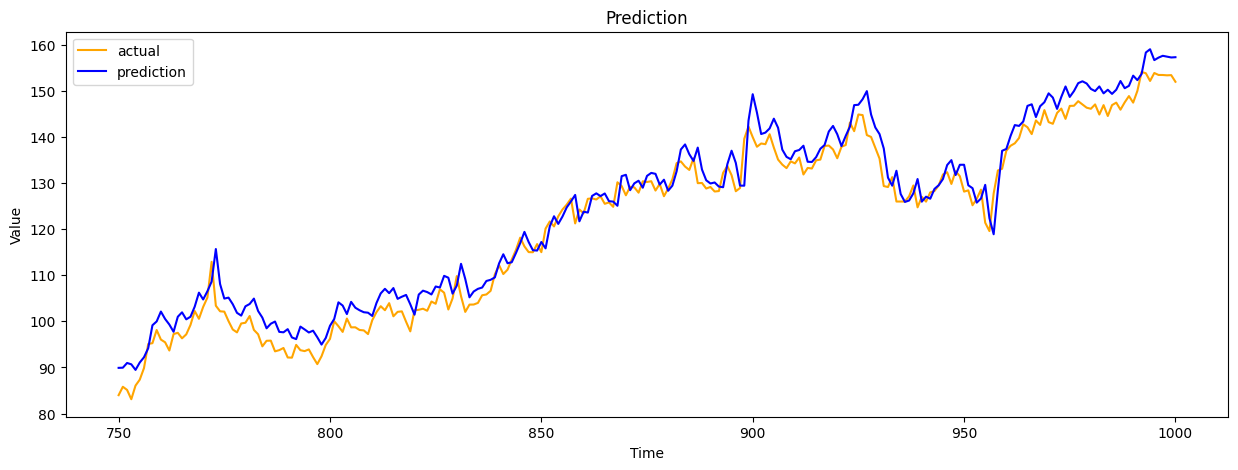

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='actual')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

### Parameter 튜닝: Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00


- 아래 부분을 수정해보세요

In [ ]:
def create_model(trial):
    n_hidden = trial.suggest_int('n_hidden', 1, 5)
    n_units = trial.suggest_int('n_units', 4, 24)  #4~24
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)

    model = Sequential()
    model.add(Dense(n_units, input_dim=48, activation='relu'))
    for i in range(n_hidden):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

In [ ]:
def objective(trial):
    model = create_model(trial)
    model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
    score = model.evaluate(x_test, y_test, verbose=0)[1]
    return score

In [ ]:
import optuna

study = optuna.create_study()
study.optimize(objective, n_trials=10, n_jobs=-1)

[I 2024-12-02 01:30:25,870] A new study created in memory with name: no-name-05b2877c-51a2-49a5-9cf7-cfacc8ae959a
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-12-02 01:30:37,630] Trial 0 finished with value: 0.9447982907295227 and parameters: {'n_hidden': 5, 'n_units': 15, 'learning_rate': 0.05313907974256069}. Best is trial 0 with value: 0.9447982907295227.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-12-02 

In [ ]:
print(study.best_params)

{'n_hidden': 1, 'n_units': 17, 'learning_rate': 0.07956174485366142}


In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [ ]:
best_model = create_model(study.best_trial)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
best_model.evaluate(x_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4220 - loss: 0.8652


0.4394904375076294

In [ ]:
for key, value in study.best_trial.params.items():
    print("{}: {}".format(key, value))

n_hidden: 2
n_units: 21
learning_rate: 0.09418190676532773


In [ ]:
from optuna.visualization import plot_contour
plot_contour(study)

In [ ]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)